## Import liabraries and data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import math

In [2]:
raw_data = pd.read_csv('E:/project-predict the house price/datasets_46927_85203_data.csv')
raw_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
raw_data.describe(include = 'all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,4600,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600,4600,4600,4600
unique,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4525,44,77,1
top,6/23/2014 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1573,148,4600
mean,NaN,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,NaN,NaN,NaN,NaN
std,NaN,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,NaN,NaN,NaN,NaN


In [4]:
raw_data_drop=raw_data.drop(['date','street','statezip','country'],axis = 1)
raw_data_drop.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


In [5]:
raw_data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
price            4600 non-null int64
bedrooms         4600 non-null int64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
city             4600 non-null object
dtypes: float64(2), int64(11), object(1)
memory usage: 503.2+ KB


In [6]:
header = raw_data_drop.columns.values
header

array(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'city'], dtype=object)

In [7]:
raw_data_drop['city'].astype('object')

0              Shoreline
1                Seattle
2                   Kent
3               Bellevue
4                Redmond
5                Seattle
6                Redmond
7           Maple Valley
8             North Bend
9                Seattle
10      Lake Forest Park
11               Seattle
12             Sammamish
13               Seattle
14               Seattle
15                  Kent
16              Bellevue
17                Auburn
18            Des Moines
19            North Bend
20               Seattle
21              Bellevue
22               Seattle
23               Bothell
24               Seattle
25           Federal Way
26               Seattle
27              Kirkland
28              Issaquah
29               Seattle
              ...       
4570             Seattle
4571             Seattle
4572             Seattle
4573             Seattle
4574            Bellevue
4575            Bellevue
4576             Seattle
4577             Seattle
4578       Mercer Island


In [8]:
raw_data_drop['city'].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Newcastle                33
Bothell                  33
Vashon                   29
SeaTac                   29
Tukwila                  29
Enumclaw                 28
Carnation                22
Normandy Park            18
Fall City                11
Medina                   11
Clyde Hill               11
Black Diamond             9
Ravensdale                7
Pacific             

In [9]:
cities=['Seattle','Renton' ,'Bellevue', 'Redmond' ,'Kirkland', 'Kent', 'Auburn', 'Sammamish', 'Federal Way', 'Shoreline', 'Issaquah', 'Woodinville']
data_city=raw_data_drop[raw_data_drop.city.isin(cities)]
data_city.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


### Average house price in each city

In [10]:
group = data_city[['price','city']]
group_one = group.groupby(['city'],as_index = False).mean()
group_one.sort_values(['price'],ascending=False,axis=0,inplace=True)
group_one['price'] = group_one['price'].round(0)
group_one.reset_index().drop(['index'],axis=1)


,city,price
0,Bellevue,847181.0
1,Sammamish,686918.0
2,Redmond,667650.0
3,Kirkland,651584.0
4,Woodinville,609565.0
5,Issaquah,596164.0
6,Seattle,579837.0
7,Kent,439492.0
8,Shoreline,420392.0
9,Renton,377041.0


In [82]:
import plotly.express as px
fig = px.bar(x=group_one['city'],y=group_one['price'],title = 'The Average of the House Price')
fig.show()

## Model

### Mutiple linear regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [13]:
lm = LinearRegression()

In [14]:
Z =raw_data_drop[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront', 'view', 'condition', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated']]
y = raw_data_drop[['price']]

In [15]:
Z_train,Z_test,y_train,y_test=train_test_split(Z,y,test_size=0.2,random_state=4)

In [16]:
lm.fit(Z_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Coefficient

In [17]:
lm.coef_

array([[-6.28082551e+04,  5.40651037e+04,  1.71408567e+02,
        -6.94880169e-01,  3.51771850e+04,  4.35609794e+05,
         3.41655463e+04,  3.98506411e+04,  9.61676272e+01,
         7.52409396e+01, -2.26778404e+03,  7.02526029e+00]])

##### Interception

In [18]:
lm.intercept_

array([4357576.76059098])

##### Correlation

In [19]:
raw_data_drop[['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


##### Prediction

In [20]:
y_hat = lm.predict(Z_test)

##### Distribution

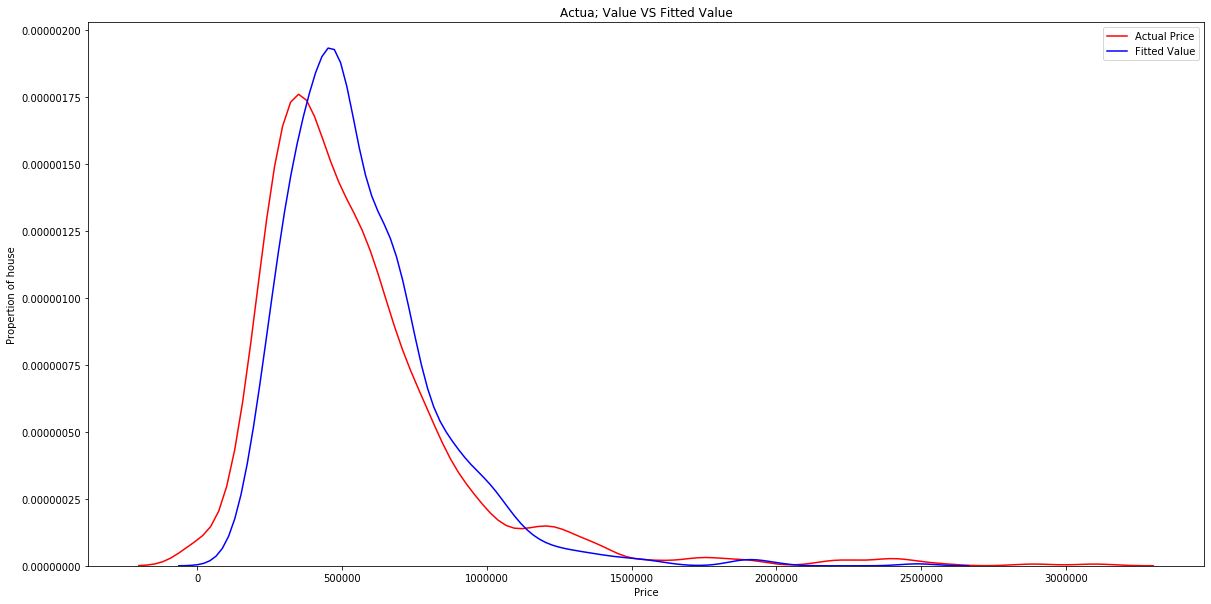

In [21]:
plt.figure(figsize = (20,10))
ax1=sns.distplot(y_test,hist = False, color = 'r', label = 'Actual Price')
sns.distplot(y_hat,hist = False, color = 'b', label = 'Fitted Value',ax=ax1)

plt.title('Actua; Value VS Fitted Value')
plt.xlabel('Price')
plt.ylabel('Propertion of house')

plt.show()
plt.show()

### Polynomial regression

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
polynomialfeatures = PolynomialFeatures(degree = 2, include_bias = False, interaction_only = True)

In [24]:
Z_poly = polynomialfeatures.fit_transform(Z_train)
Z_poly_test = polynomialfeatures.fit_transform(Z_test)

In [25]:
lm_poly = LinearRegression()
lm_poly.fit(Z_poly,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Coefficient

In [26]:
lm_poly.coef_

array([[ 6.62671150e+05, -2.85856587e+06,  1.78800728e+03,
        -2.36147801e+01,  2.69175889e+05, -1.39782220e+07,
        -1.16942711e+05,  5.25254215e+05,  1.12278585e+03,
         7.90125503e+02,  1.41175456e+03,  2.21903071e+03,
        -3.86774070e+03, -8.81593211e+00,  3.48724963e-01,
        -6.69110829e+03,  2.70261323e+04,  1.03172846e+04,
         3.69029322e+03,  2.03427322e+01, -2.09116822e+01,
        -3.65769361e+02, -5.60338783e+00, -7.45254051e+00,
         4.70017497e-01,  3.51012974e+03, -4.45694801e+05,
         2.29849529e+03,  5.56468411e+04, -3.49092995e+01,
         2.74291034e+01,  1.40717004e+03,  2.97928033e+01,
         1.50063346e+02,  2.43183213e+00,  2.34870111e+02,
        -1.17991747e+01, -1.63366170e+01,  4.41385379e-02,
         9.18270962e-03, -4.26988913e+01,  2.80662819e+01,
         2.00673983e-01, -1.22751933e+01, -1.88227378e-01,
         9.32491941e-02, -1.50064604e+02, -1.50064842e+02,
         1.19168949e-02,  1.65529797e-04, -2.18069255e+0

##### Interception

In [27]:
lm_poly.intercept_

array([-2433208.8848938])

##### Prediction

In [28]:
y_poly_prediction = lm_poly.predict(Z_poly_test)


##### Distribution

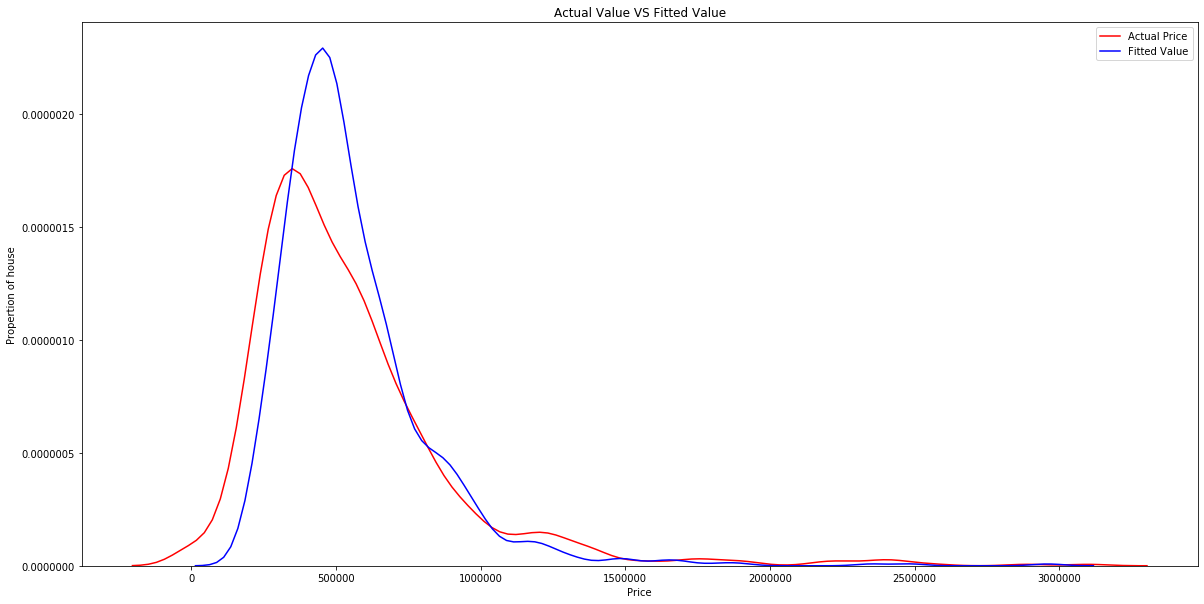

In [29]:
plt.figure(figsize = (20,10))
ax2=sns.distplot(y_test,hist = False, color = 'r', label = 'Actual Price')
sns.distplot(y_poly_prediction,hist = False, color = 'b', label = 'Fitted Value',ax=ax2)

plt.title('Actual Value VS Fitted Value')
plt.xlabel('Price')
plt.ylabel('Propertion of house')

plt.show()
plt.show()

## Evaluation of two models

In [30]:
from sklearn.metrics import mean_squared_error


### Linear Regression

##### Mean Squared Error

In [31]:
lm_mse = mean_squared_error(y_test,y_hat)
lm_mse

66822952800.235596

##### R-squared

In [32]:
R2 =lm.score(Z_test,y_test)
R2

0.49260781323704905

##### Adjusted R-squared

In [33]:
n = Z.shape[0]
p = Z.shape[1]
Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
Adj_r2

0.4912804301454521

### Polynomial Regression

##### Mean Squared Error

In [34]:
lm_poly_mse = mean_squared_error(y_test,y_poly_prediction)
lm_poly_mse

64596953471.03813

##### R-squared

In [35]:
R2_poly=lm_poly.score(Z_poly_test,y_test)
R2_poly

0.5095100095639732

##### Adjusted R-squared

In [36]:
Adj_r2_poly = 1-(1-R2_poly)*(n-1)/(n-p-1)
Adj_r2_poly

0.5082268441213675

### Summary of Evalution

In [37]:
df_1 = pd.DataFrame(data=[lm_mse,lm_poly_mse],columns=['Mean Squared Error'],index = ['Multiple Linear Regression','Multivariate Polynomial Regression'])
df_1['R-square']=[R2,R2_poly]
df_1['Adjusted R-square']=[Adj_r2,Adj_r2_poly]
df_1

,Mean Squared Error,R-square,Adjusted R-square
Multiple Linear Regression,6.682295e+10,0.492608,0.491280
Multivariate Polynomial Regression,6.459695e+10,0.509510,0.508227


### Check P-value of each feature

In [38]:
from sklearn.feature_selection import f_regression

In [39]:
df_summary = pd.DataFrame(data = Z.columns.values, columns = ['Features'])
df_summary['Coefficient']=lm.coef_.reshape(12,)
df_summary['P-value']=f_regression(Z_train,y_train)[1].round(4)
df_summary

E:\python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



,Features,Coefficient,P-value
0,bedrooms,-62808.255052,0.0000
1,bathrooms,54065.103747,0.0000
2,sqft_living,171.408567,0.0000
3,sqft_lot,-0.694880,0.0074
4,floors,35177.185016,0.0000
5,waterfront,435609.794126,0.0000
6,view,34165.546349,0.0000
7,condition,39850.641065,0.0058
8,sqft_above,96.167627,0.0000
9,sqft_basement,75.240940,0.0000


In [40]:
Z_new = Z.drop(['yr_built','condition'],axis=1)
Z_new_train,Z_new_test,y_new_train,y_new_test=train_test_split(Z_new,y,test_size=0.2,random_state=4)
lm_new = LinearRegression()
lm_new.fit(Z_new_train,y_new_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### R-squared

In [41]:
R2_new=lm_new.score(Z_new_test,y_new_test)
R2_new

0.4638498209598429

##### Adjusted R-squared

In [42]:
n_new = Z_new.shape[0]
p_new = Z_new.shape[1]

Adj_r2_new = 1-(1-R2_new)*(n_new-1)/(n-p_new-1)
Adj_r2_new

0.4626814832412982

##### Mean Squared Error

In [43]:
y_hat_new = lm_new.predict(Z_new_test)
lm_mse_new = mean_squared_error(y_hat_new,y_new_test)
lm_mse_new

70610346478.54442

##### Summary

In [44]:
df_2 = pd.DataFrame(data=[lm_mse_new],columns=['Mean Squared Error'],index = ['Multiple Linear Regression'])
df_2['R-square']=[R2_new]
df_2['Adjusted R-square']=[Adj_r2_new]
df_2

,Mean Squared Error,R-square,Adjusted R-square
Multiple Linear Regression,7.061035e+10,0.46385,0.462681


## The cities with over 100 data

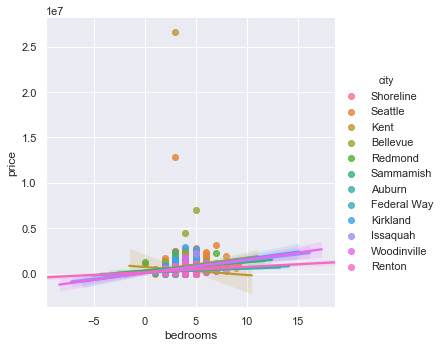

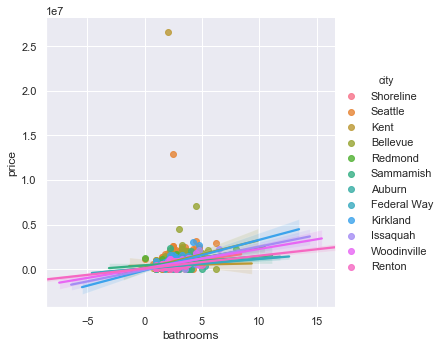

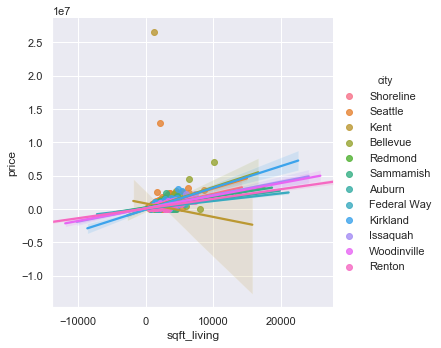

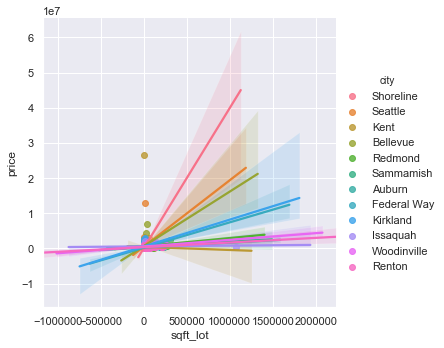

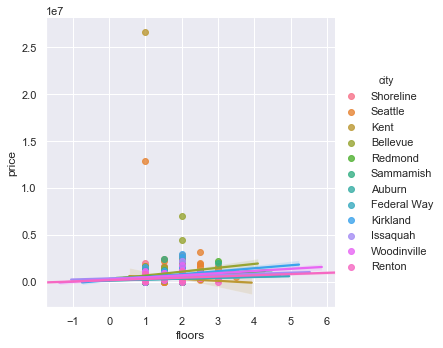

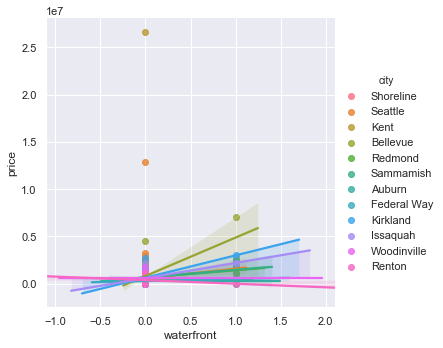

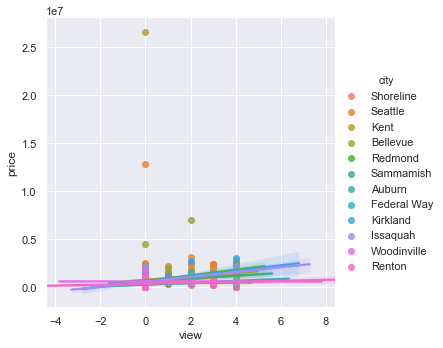

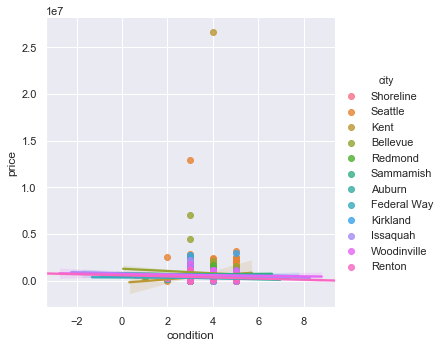

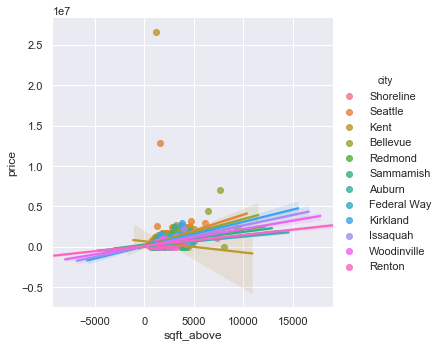

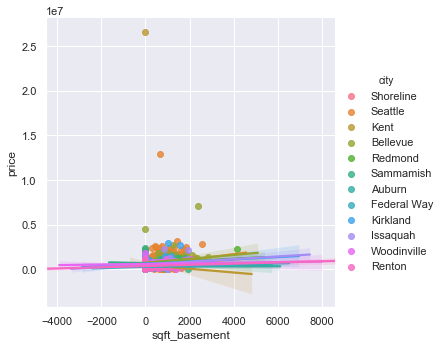

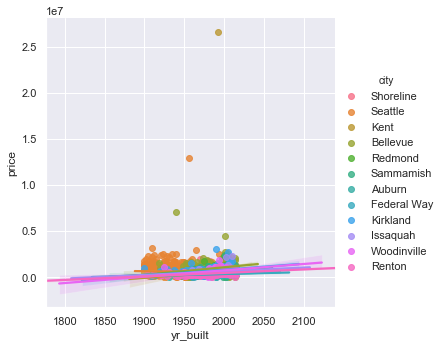

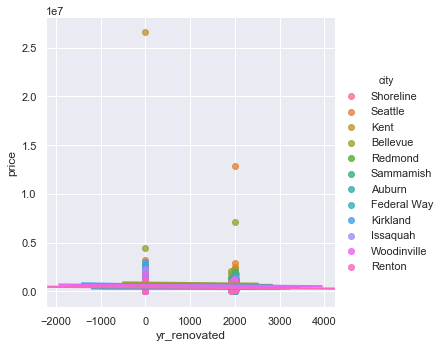

In [93]:
headers = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']
for feature in headers:
    sns.lmplot(x=feature,y='price',hue='city',data=data_city)

## Pick one city (Seattle)

In [46]:
data = raw_data[raw_data['city']=='Seattle']
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1,5/2/2014 0:00,2384000,5,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
5,5/2/2014 0:00,490000,2,1.0,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
9,5/2/2014 0:00,640000,4,2.0,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA
11,5/2/2014 0:00,1400000,4,2.5,2920,4000,1.5,0,0,5,1910,1010,1909,1988,3838-4098 44th Ave NE,Seattle,WA 98105,USA
13,5/2/2014 0:00,365000,3,1.0,1090,6435,1.0,0,0,4,1090,0,1955,2009,2504 SW Portland Ct,Seattle,WA 98106,USA


In [47]:
data.describe(include = 'all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,1573,1.573000e+03,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573,1573,1573,1573
unique,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1543,1,25,1
top,5/20/2014 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353 N 105th St,Seattle,WA 98103,USA
freq,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1573,148,1573
mean,NaN,5.798375e+05,3.169739,1.962174,1828.623649,5326.625556,1.530833,0.002543,0.297521,3.523204,1437.729816,390.893833,1952.338843,992.223776,NaN,NaN,NaN,NaN
std,NaN,4.627382e+05,1.005608,0.807733,824.783359,4117.928020,0.605454,0.050379,0.840589,0.747516,613.652822,439.664051,34.712179,997.060690,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,0.000000,0.000000,370.000000,638.000000,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,3.690000e+05,3.000000,1.000000,1250.000000,3400.000000,1.000000,0.000000,0.000000,3.000000,1020.000000,0.000000,1925.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,4.900000e+05,3.000000,2.000000,1660.000000,5000.000000,1.500000,0.000000,0.000000,3.000000,1270.000000,250.000000,1946.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,6.705000e+05,4.000000,2.500000,2240.000000,6490.000000,2.000000,0.000000,0.000000,4.000000,1680.000000,750.000000,1982.000000,1999.000000,NaN,NaN,NaN,NaN


### Linear Regression

In [48]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
Z_sea = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']]
y_sea = data['price']

In [50]:
Z_sea_train,Z_sea_test,y_sea_train,y_sea_test = train_test_split(Z_sea,y_sea,test_size=0.2,random_state=4)

In [51]:
model.fit(Z_sea_train,y_sea_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Coefficient

In [52]:
model.coef_

array([-6.28397588e+04,  6.82966449e+04,  1.74042396e+02, -4.19410100e+00,
       -2.44444564e+03,  2.46710068e+05,  4.26909707e+04,  2.72111082e+04,
        1.84821936e+02, -1.07795405e+01, -1.60528357e+03,  1.14730891e+01])

##### Interception

In [53]:
model.intercept_

3106539.334973053

##### Prediction

In [54]:
y_sea_hat = model.predict(Z_sea_test)

##### Distribution

Text(0, 0.5, 'Propertion of House')

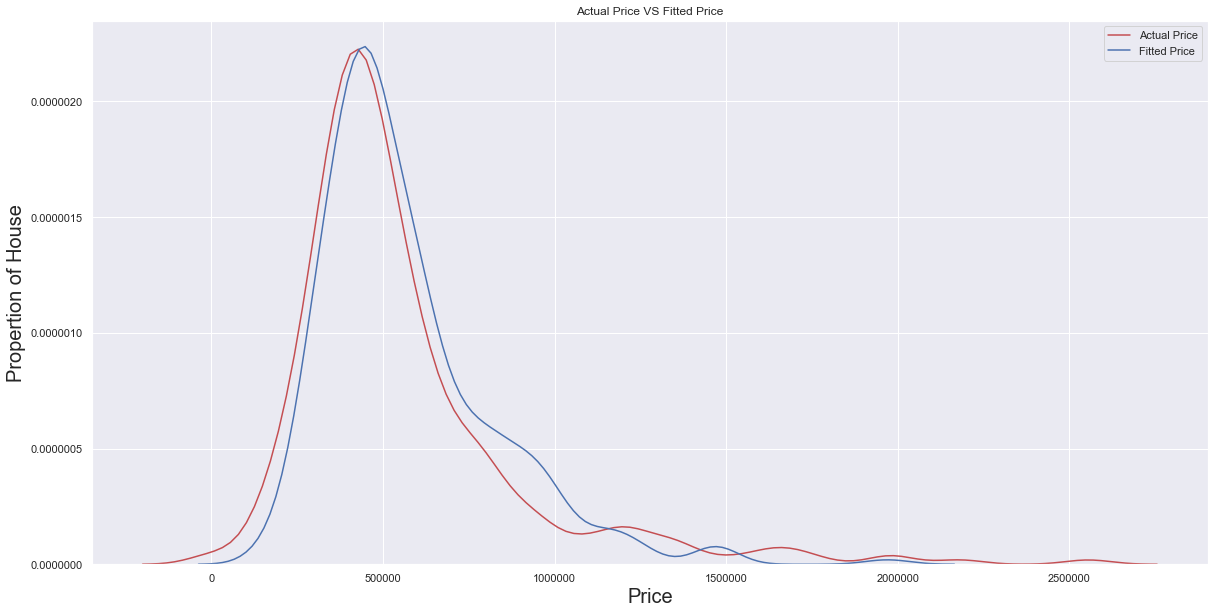

In [55]:
sns.set()
plt.figure(figsize=(20,10))

ax1=sns.distplot(y_sea_test,hist=False,color='r',label='Actual Price')
sns.distplot(y_sea_hat,hist=False,color='b',label='Fitted Price',ax=ax1)

plt.title('Actual Price VS Fitted Price')
plt.xlabel('Price',size=20)
plt.ylabel('Propertion of House',size=20)

### Polynomial Regression

In [56]:
pf = PolynomialFeatures(degree=2)

In [57]:
Z_sea_poly = pf.fit_transform(Z_sea_train)
Z_sea_poly_test = pf.fit_transform(Z_sea_test)

In [58]:
model_poly = LinearRegression()
model_poly

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
model_poly.fit(Z_sea_poly,y_sea_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Coefficient

In [60]:
model_poly.coef_

array([-5.28128254e-01,  1.41481993e+06,  6.78014798e+05, -2.80731733e+02,
        1.17639598e+00, -3.12836260e+06, -4.07262600e-02,  1.64467846e+06,
       -1.25747526e+06,  2.15838883e+03, -2.43909621e+03, -2.61132648e+04,
        2.88215463e+02, -4.57055361e+03, -5.53865803e+03, -1.93577875e+01,
       -3.30783241e+00,  4.71367833e+04, -9.52497747e-04,  3.49139831e+04,
        4.38312568e+03, -1.90053229e+01, -3.17976941e-01, -7.45204674e+02,
        1.08299100e+01, -2.55573731e+04,  6.34830877e+01,  2.51248738e+01,
        5.49830270e+04, -3.84285293e-04, -1.10572772e+05, -7.00803792e+04,
       -3.88503535e+01,  1.02333415e+02, -2.76408443e+02,  7.69553908e+00,
       -1.51539268e-03,  5.15158321e-02, -1.23891058e+02, -3.89234081e-01,
        3.02685270e+01,  3.03356286e+01,  4.79845367e-02, -1.18600691e-01,
        2.79304610e-01, -5.75616175e-02,  5.86069655e-06, -2.33247030e+01,
       -8.36545246e+00,  2.88768239e+00,  3.76532914e-01, -6.14472684e-02,
       -7.84393565e-02,  


##### Interception

In [61]:
model_poly.intercept_

27625858.725655712

##### Prediction

In [62]:
y_sea_prediction = model_poly.predict(Z_sea_poly_test)

##### Distribution

Text(0, 0.5, 'Propertion of House')

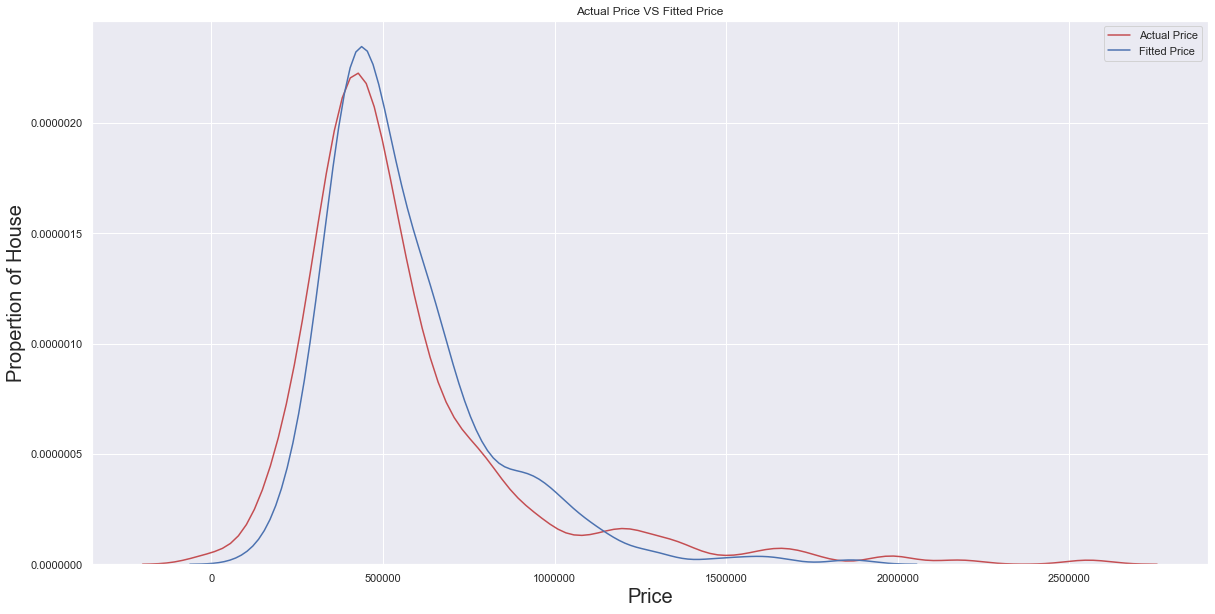

In [63]:
sns.set()
plt.figure(figsize=(20,10))

ax1=sns.distplot(y_sea_test,hist=False,color='r',label='Actual Price')
sns.distplot(y_sea_prediction,hist=False,color='b',label='Fitted Price',ax=ax1)

plt.title('Actual Price VS Fitted Price')
plt.xlabel('Price',size=20)
plt.ylabel('Propertion of House',size=20)


## Evaluation of two models

### Linear Regression

##### R-squared

In [64]:
R2_sea=model.score(Z_sea_test,y_sea_test)
R2_sea

0.6947769431465924

##### Adjusted R_squared

In [65]:
n_sea = Z_sea.shape[0]
p_sea = Z_sea.shape[1]
Aj_R2_sea = 1-(1-R2_sea)*(n_sea-1)/(n_sea-p_sea-1)
Aj_R2_sea

0.6924290734784893

##### Mean Squared Error

In [66]:
lm_sea=mean_squared_error(y_sea_test,y_sea_hat)
lm_sea

35482534160.49615

### Polynomial Regression

##### R-squared

In [67]:
R2_sea_poly=model_poly.score(Z_sea_poly_test,y_sea_test)
R2_sea_poly

0.6379454380096239

##### Adjusted R-squared

In [68]:
Aj_R2_sea_poly = 1-(1-R2_sea_poly)*(n_sea-1)/(n_sea-p_sea-1)
Aj_R2_sea_poly

0.6351604029173903

##### Mean Squared Error

In [69]:
lm_sea_poly=mean_squared_error(y_sea_test,y_sea_prediction)
lm_sea_poly

42089262509.27679

### Summary of Evalution

In [70]:
df_3 = pd.DataFrame(data=[lm_mse,lm_sea_poly],columns=['Mean Squared Error'],index = ['Multiple Linear Regression','Multivariate Polynomial Regression'])
df_3['R-square']=[R2_sea,R2_sea_poly]
df_3['Adjusted R-square']=[Aj_R2_sea,Aj_R2_sea_poly]
df_3

,Mean Squared Error,R-square,Adjusted R-square
Multiple Linear Regression,6.682295e+10,0.694777,0.692429
Multivariate Polynomial Regression,4.208926e+10,0.637945,0.635160


### Check the p-value

In [71]:
data[['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.278262,0.386559,0.548448,0.168163,0.165199,0.110804,0.307517,0.131678,0.527010,0.293292,-0.075370,-0.029458
bedrooms,0.278262,1.000000,0.530865,0.649258,0.189482,0.130359,0.041701,0.162221,0.111963,0.552971,0.446170,-0.033394,-0.016260
bathrooms,0.386559,0.530865,1.000000,0.693566,0.028094,0.469523,0.037538,0.275640,0.020155,0.624389,0.429609,0.347239,-0.224450
sqft_living,0.548448,0.649258,0.693566,1.000000,0.310559,0.215378,0.091328,0.415243,0.160905,0.853073,0.685279,-0.004112,-0.067289
sqft_lot,0.168163,0.189482,0.028094,0.310559,1.000000,-0.284793,0.277771,0.266187,0.072299,0.290336,0.177360,-0.193788,0.199322
floors,0.165199,0.130359,0.469523,0.215378,-0.284793,1.000000,0.018283,0.051335,-0.183952,0.437942,-0.207213,0.485381,-0.321060
waterfront,0.110804,0.041701,0.037538,0.091328,0.277771,0.018283,1.000000,0.192424,-0.035351,0.094428,0.039530,-0.020500,0.025646
view,0.307517,0.162221,0.275640,0.415243,0.266187,0.051335,0.192424,1.000000,0.060885,0.339667,0.304887,-0.031712,0.035221
condition,0.131678,0.111963,0.020155,0.160905,0.072299,-0.183952,-0.035351,0.060885,1.000000,0.018284,0.276329,-0.395239,-0.213175
sqft_above,0.527010,0.552971,0.624389,0.853073,0.290336,0.437942,0.094428,0.339667,0.018284,1.000000,0.204583,0.068971,-0.080315


In [72]:
from sklearn.feature_selection import f_regression

In [73]:
reg_summary = pd.DataFrame(data = Z_sea.columns.values, columns=['Features'])
reg_summary['Coefficients']=model.coef_
reg_summary['P-value']=f_regression(Z_sea_train,y_sea_train)[1].round(4)
reg_summary

,Features,Coefficients,P-value
0,bedrooms,-62839.758781,0.0000
1,bathrooms,68296.644921,0.0000
2,sqft_living,174.042396,0.0000
3,sqft_lot,-4.194101,0.0000
4,floors,-2444.445644,0.0000
5,waterfront,246710.068015,0.4241
6,view,42690.970676,0.0000
7,condition,27211.108182,0.0000
8,sqft_above,184.821936,0.0000
9,sqft_basement,-10.779540,0.0000


In [74]:
Z_sea_new = Z_sea.drop(['yr_renovated','waterfront'],axis=1)

In [75]:
Z_sea_new_train,Z_sea_new_test,y_train,y_test = train_test_split(Z_sea_new,y_sea,test_size=0.2,random_state=4)
lm_sea_new = LinearRegression()
lm_sea_new.fit(Z_sea_new_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### R-squared

In [76]:
R2_sea_new=lm_sea_new.score(Z_sea_new_test,y_test)
R2_sea_new

0.6796939310249063


##### Adjusted R-squared

In [77]:
n_sea_new = Z_sea_new.shape[0]
p_sea_new = Z_sea_new.shape[1]
Aj_R2_sea_new = 1-(1-R2_sea_new)*(n_sea_new-1)/(n_sea_new-p_sea_new-1)
Aj_R2_sea_new

0.6776433159866535

##### Mean Squared Error

In [78]:
y_sea_prediction_new = lm_sea_new.predict(Z_sea_new_test)
lm_sea_new=mean_squared_error(y_sea_test,y_sea_prediction_new)
lm_sea_new

37235951803.213554

### Summary

In [79]:
df_4 = pd.DataFrame(data=[lm_sea_new],columns=['Mean Squared Error'],index = ['Multiple Linear Regression'])
df_4['R-square']=[R2_sea_new]
df_4['Adjusted R-square']=[Aj_R2_sea_new]
df_4

,Mean Squared Error,R-square,Adjusted R-square
Multiple Linear Regression,3.723595e+10,0.679694,0.677643


# Conclusion

## My first idea was to use all data to train a model and to prediction the price of house in USA, which was unappropriate because the features could make difference influence in each city. I need to focus on a specific city to train the model and predict the price in the city. In the example of Seattle, the 'yr_renovated' and 'waterfront' columns needed to be removed because these two features were not significant. And multiple linear regression was more appropriate.